In [1]:
import joblib
import json
import pandas
import numpy
import seaborn

import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics

import matplotlib.pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train= pandas.read_csv('../data/features.train.csv').set_index('id')
data_train

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
2103,1.395470,2.0,14.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14649,-0.873898,0.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7379,-0.592186,2.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24479,-1.349595,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19532,2.041210,3.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.405521,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2192,-0.821560,2.0,9.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8250,1.210247,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
data_train, data_validation= sklearn.model_selection.train_test_split(
    data_train,
    train_size   = 0.75,
    shuffle      = True,
    random_state = 4
)

In [4]:
data_train

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
9691,0.563665,1.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5909,0.042488,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16574,1.250439,3.0,11.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6969,-0.004150,1.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16791,-1.528830,2.0,8.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10216,1.757814,1.0,12.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5167,1.873625,0.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26902,-0.143452,3.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
data_validation

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
4916,1.609722,3.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1386,-0.718059,2.0,14.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7066,-1.435898,3.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10301,-0.218498,3.0,12.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
24687,-0.178526,4.0,8.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12542,-0.097943,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5662,-0.311659,3.0,11.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
27865,0.370552,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
model = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes    = (20, 10),
    solver                = 'sgd', 
    activation            = 'logistic',
    alpha                 = 0.002,  
    batch_size            = 32,
    learning_rate         = 'constant',
    learning_rate_init    = 0.1,
    max_iter              = 1000,
    momentum              = 0.0, 
    nesterovs_momentum    = False, 
    validation_fraction   = 0.0, 
    shuffle               = True,
    random_state          = 0
)
model

MLPClassifier(activation='logistic', alpha=0.002, batch_size=32,
              hidden_layer_sizes=(20, 10), learning_rate_init=0.1,
              max_iter=1000, momentum=0.0, nesterovs_momentum=False,
              random_state=0, solver='sgd', validation_fraction=0.0)

In [7]:
data_train_features      = data_train.drop(['label'], axis='columns')
data_train_labels        = data_train['label']

data_validation_features = data_validation.drop(['label'], axis='columns')
data_validation_labels   = data_validation['label']

best_nll_validation = numpy.inf
training_results = []

for i in range(1, 400):

    model.partial_fit(
        X       = data_train_features,
        y       = data_train_labels,
        classes = [0, 1]
    )
    
    # insert code here
    nll_train = sklearn.metrics.log_loss(
        y_true = data_train_labels,
        y_pred =  model.predict(data_train_features)
    )
    f1_train = sklearn.metrics.f1_score(
        y_true = data_train_labels,
        y_pred = model.predict(data_train_features)
    )
    
    nll_validation = sklearn.metrics.log_loss(
        y_true = data_validation_labels,
        y_pred =  model.predict(data_validation_features)
    )
    f1_validation = sklearn.metrics.f1_score(
        y_true = data_validation_labels,
        y_pred = model.predict(data_validation_features)
    )

    training_results.append({
        'iter'            : i,
        'nll_train'       : nll_train,
        'f1_train'        : f1_train,
        'nll_validation'  : nll_validation,
        'f1_validation'   : f1_validation,
    })
        
    if nll_validation < best_nll_validation:
        best_nll_validation = nll_validation
        joblib.dump(model, '../model/model_with_early_stop.joblib')
        

training_results = pandas.DataFrame(training_results).set_index('iter')

In [8]:
training_results

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
1,15.007969,0.000000,15.432827,0.000000
2,14.204682,0.102653,14.641872,0.097506
3,7.526979,0.751744,7.688822,0.750894
4,7.251041,0.751393,7.532471,0.747456
5,7.082412,0.750216,7.284147,0.751256
...,...,...,...,...
395,5.825361,0.807028,6.575966,0.787139
396,5.825361,0.807028,6.575966,0.787139
397,5.822295,0.807149,6.575966,0.787139


# Instructions

- Plot the `nll_train` and `nll_validation` against `iter`
- Plot the `f1_train` and `f1_validation` against `iter`
- Find the training iteration that achieves the minimum validation loss
  - Hint: use `.idxmin` on `nll_validation`
- Also, use `.get_params`, `json.dump` to save the model configuration to  `./model/config.json`


<Axes: xlabel='iter', ylabel='nll_train'>

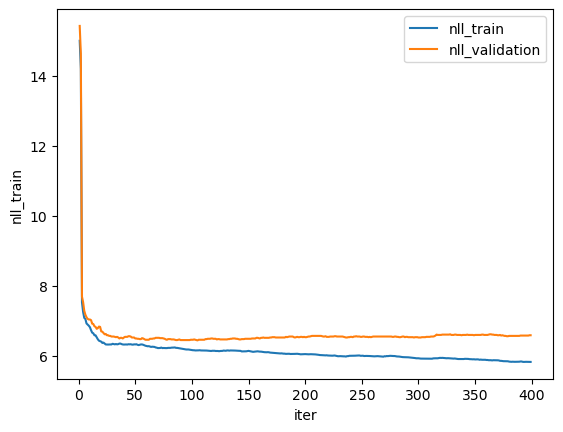

In [9]:
seaborn.lineplot(
    data= training_results,
    x = 'iter',
    y = 'nll_train',
    label = 'nll_train'
)

seaborn.lineplot(
    data= training_results,
    x = 'iter',
    y = 'nll_validation',
    label = 'nll_validation'
)

<Axes: xlabel='iter', ylabel='f1_train'>

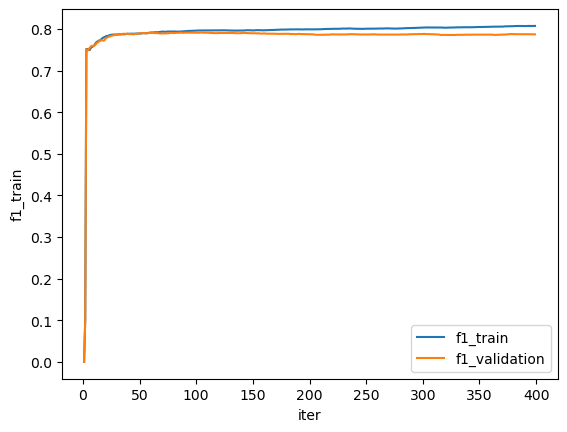

In [10]:
seaborn.lineplot(
    data= training_results,
    x = 'iter',
    y = 'f1_train',
    label = 'f1_train'
)

seaborn.lineplot(
    data= training_results,
    x = 'iter',
    y = 'f1_validation',
    label = 'f1_validation'
)

In [11]:
training_results['nll_validation'].idxmin()

105

In [12]:
training_results.loc[95:115]

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
95,6.177948,0.795411,6.447206,0.791058
96,6.177948,0.795411,6.447206,0.791058
97,6.177948,0.795411,6.447206,0.791058
98,6.171816,0.795655,6.447206,0.791058
99,6.165684,0.795817,6.456403,0.790822
100,6.162619,0.795898,6.456403,0.790822
101,6.156487,0.796101,6.456403,0.790822
102,6.156487,0.796101,6.465600,0.790587
103,6.150355,0.796262,6.456403,0.790822


In [13]:
with open('../model/model_with_early_stop_config.json', 'w') as f:
    json.dump(model.get_params(), f)